<a href="https://colab.research.google.com/github/Henriquerezer/Kaggle/blob/main/Titanic/notebook1_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df_train = pd.read_csv('train.csv')
df_train

df_test = pd.read_csv('test.csv')
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df_test.head(3), df_test.shape

(   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
 0          892       3                  Kelly, Mr. James    male  34.5      0   
 1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
 2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   
 
    Parch  Ticket    Fare Cabin Embarked  
 0      0  330911  7.8292   NaN        Q  
 1      0  363272  7.0000   NaN        S  
 2      0  240276  9.6875   NaN        Q  ,
 (418, 11))

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## AGE 

In [ ]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((df_train['Age'].isnull().sum()/df_train.shape[0])*100))

Percent of missing "Age" records is 19.87%


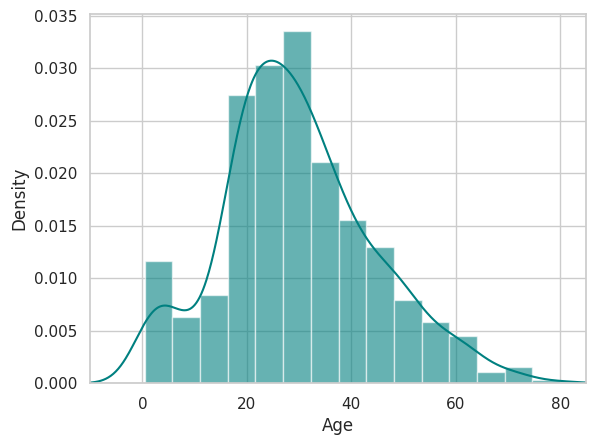

In [ ]:
ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
# mean age
print('The mean of "Age" is %.2f' %(df_train["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df_train["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


## CABIN

In [ ]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((df_train['Cabin'].isnull().sum()/df_train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


**This column has many missing values, it is more interesting to exclude this column from our analysis**

## EMBARKED

In [ ]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((df_train['Embarked'].isnull().sum()/df_train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


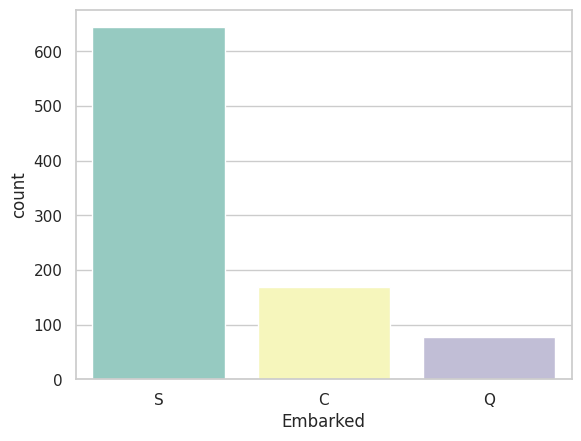

In [ ]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df_train, palette='Set3')
plt.show()

In [ ]:
print('The most common boarding port of embarkation is %s.' %df_train['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


**In this column we have very few missing values, about 2%, so we will replace these missing values with the most common class**

## Including missing data

In [ ]:
train_data = df_train.copy()
train_data["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(df_train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


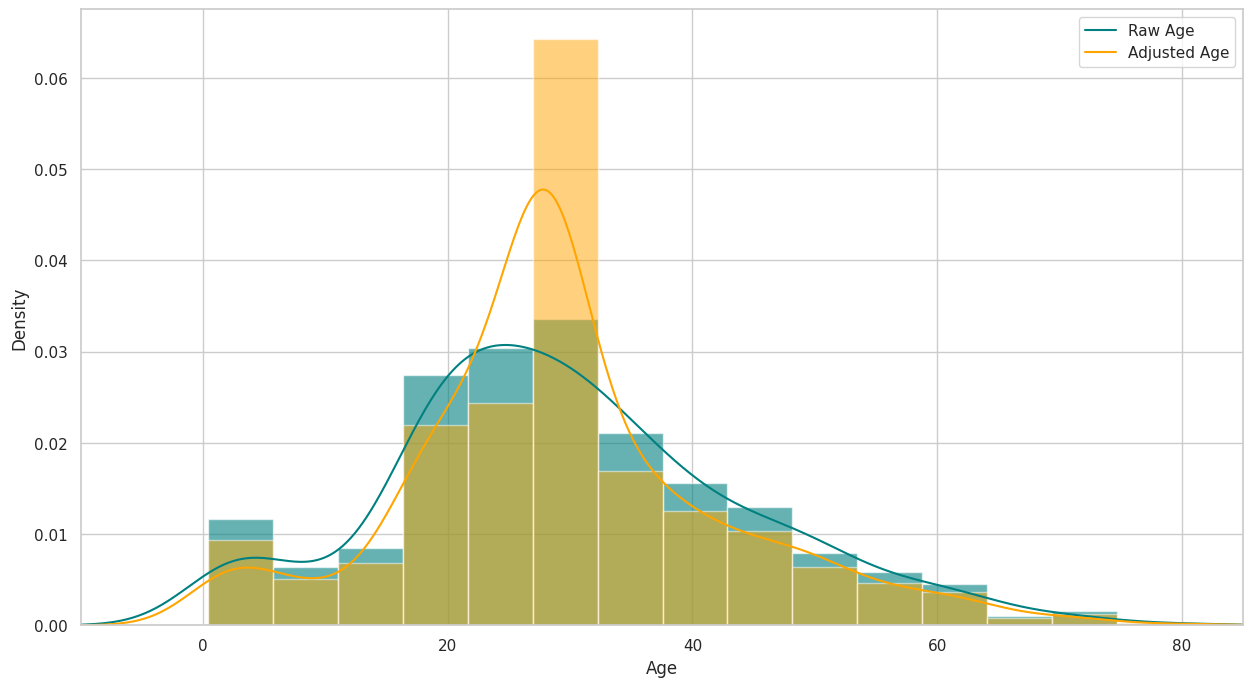

In [ ]:
plt.figure(figsize=(15,8))
ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## Adtional Variable

In [ ]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,1


In [ ]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data = df_test.copy()
test_data["Age"].fillna(df_test["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(df_test["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


## Data Analysis

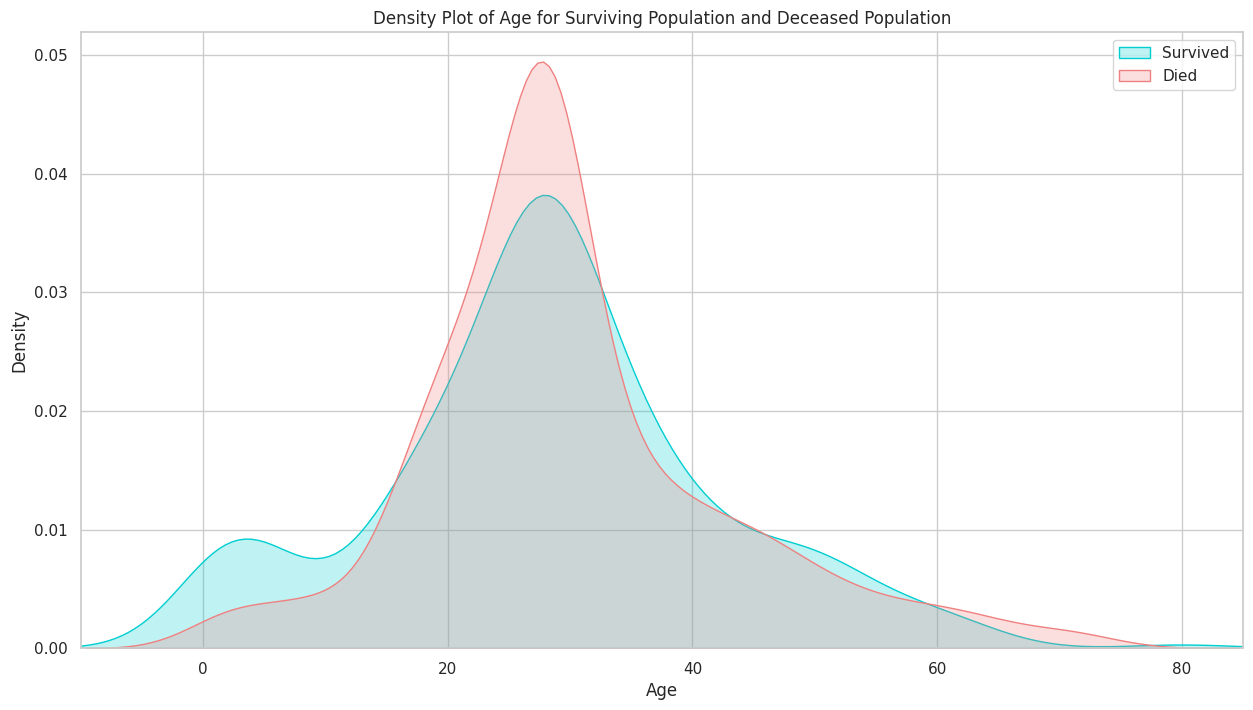

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

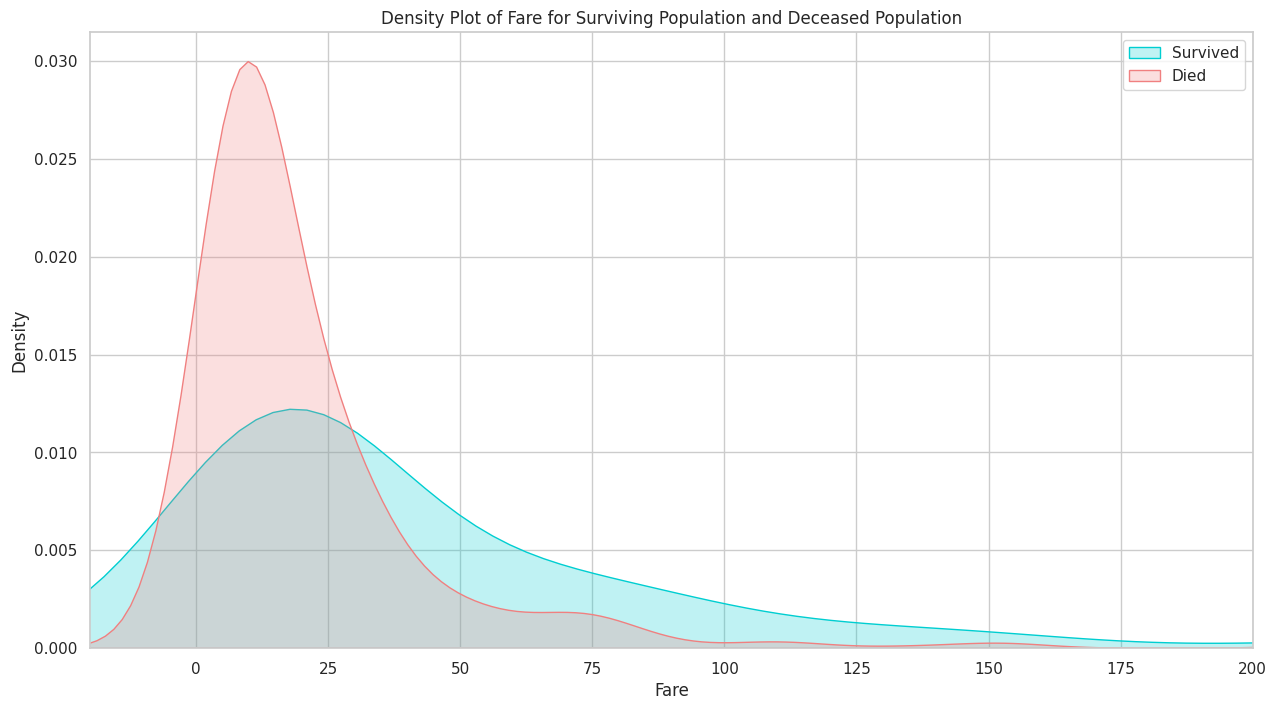

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

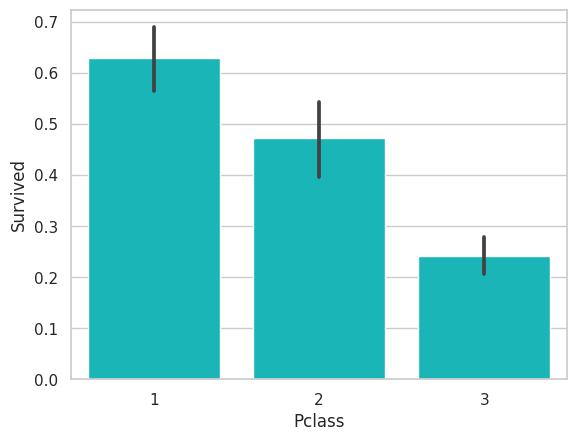

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df_train, color="darkturquoise")
plt.show()

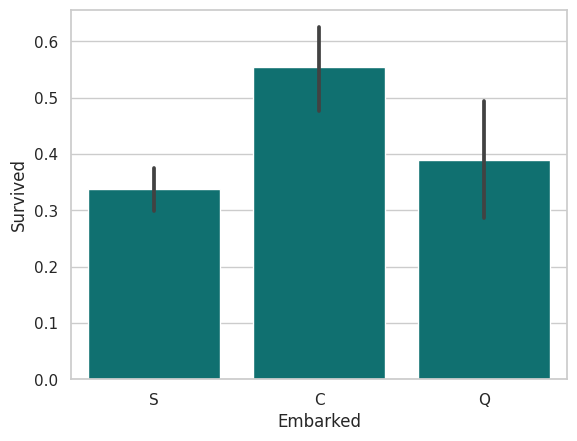

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=df_train, color="teal")
plt.show()

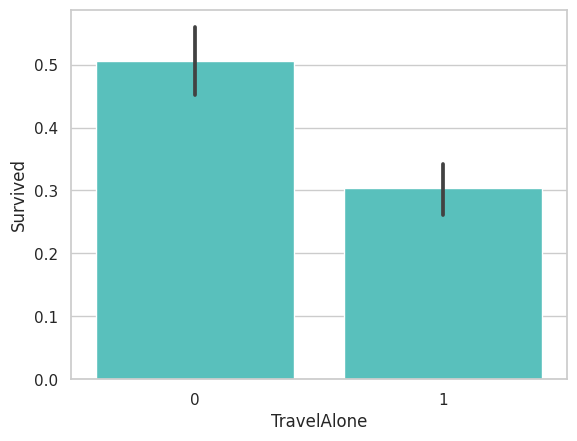

In [ ]:
sns.barplot(x='TravelAlone', y='Survived', data=final_train, color="mediumturquoise")
plt.show()

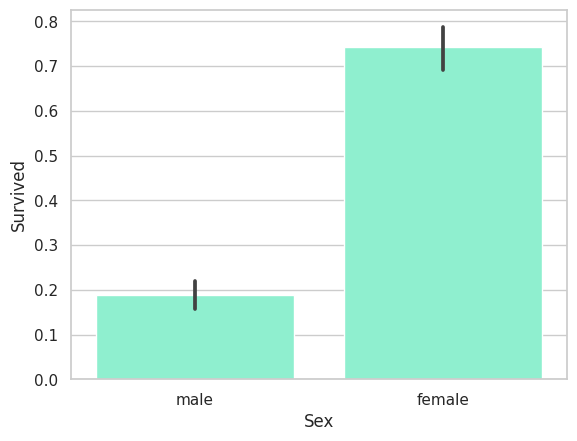

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df_train, color="aquamarine")
plt.show()

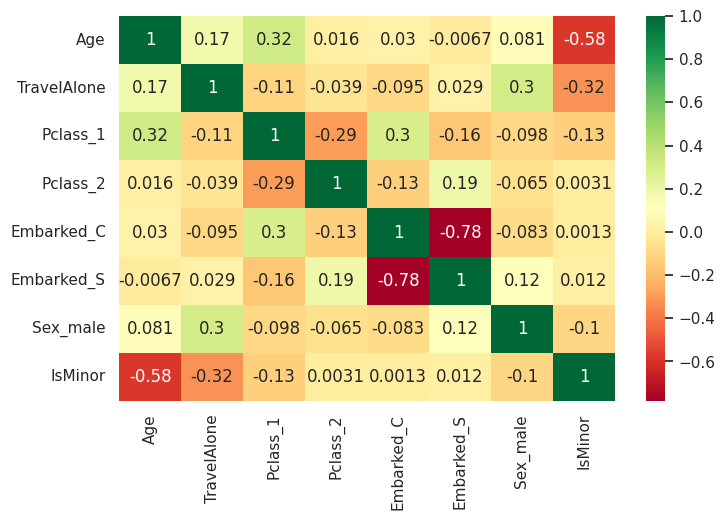

In [ ]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
!pip install --upgrade pycaret threadpoolctl


!pip install -U --pre pycaret
!pip install pycaret[full]
!pip install --upgrade packaging

In [ ]:
from sklearn.model_selection import train_test_split
X = final_train.drop('Survived', axis = 1)
y = final_train['Survived']

X_train,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=41, stratify = y)

In [ ]:
from pycaret.classification import *

In [ ]:
setup_Teste = setup(data = X_train,
                target = y_train,
                normalize = True,
                session_id = 42, 
                fold= 10, 
                fold_strategy='stratifiedkfold',
                preprocess = True)

melhores = compare_models(n_select=5, sort='Accuracy')

,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(668, 12)"
4,Transformed data shape,"(668, 12)"
5,Transformed train set shape,"(467, 12)"
6,Transformed test set shape,"(201, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8352,0.8779,0.7154,0.8370,0.7673,0.6415,0.6497,0.3360
lightgbm,Light Gradient Boosting Machine,0.8310,0.8729,0.7657,0.7888,0.7756,0.6404,0.6420,0.4250
gbc,Gradient Boosting Classifier,0.8157,0.8741,0.6925,0.8014,0.7372,0.5978,0.6057,0.1870
xgboost,Extreme Gradient Boosting,0.8074,0.8684,0.7484,0.7523,0.7479,0.5924,0.5949,0.1240
rf,Random Forest Classifier,0.8073,0.8752,0.7258,0.7677,0.7408,0.5883,0.5941,0.4430
knn,K Neighbors Classifier,0.8031,0.8463,0.7049,0.7694,0.7314,0.5772,0.5824,0.1520
et,Extra Trees Classifier,0.7922,0.8536,0.7036,0.7522,0.7222,0.5571,0.5626,0.2730
dt,Decision Tree Classifier,0.7794,0.7688,0.7199,0.7128,0.7112,0.5336,0.5392,0.1740
lr,Logistic Regression,0.7732,0.8319,0.6206,0.7591,0.6748,0.5044,0.5163,0.8500
ada,Ada Boost Classifier,0.7688,0.8297,0.6869,0.7064,0.6931,0.5084,0.5115,0.2870


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [ ]:
modelo_stack = stack_models(melhores)
########################################################################################################

# Realizando a predição no dataset de teste do experimento "parcial"
pred = predict_model(modelo_stack, X_test) # 

coluna_resposta_previsao = pred['prediction_label']

from sklearn.metrics import accuracy_score
print('\nAcuracia no df_parcial_teste: ', accuracy_score(y_test, coluna_resposta_previsao))

from sklearn.metrics import f1_score
print('\nF1 Score no df_parcial_teste: ', f1_score(y_test, coluna_resposta_previsao))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8085,0.8276,0.7778,0.7368,0.7568,0.5991,0.5996
1,0.8723,0.9483,0.8889,0.8000,0.8421,0.7355,0.7383
2,0.8085,0.9023,0.7778,0.7368,0.7568,0.5991,0.5996
3,0.8298,0.8506,0.7222,0.8125,0.7647,0.6321,0.6348
4,0.8298,0.8381,0.6111,0.9167,0.7333,0.6155,0.6428
5,0.8511,0.8966,0.7778,0.8235,0.8000,0.6815,0.6822
6,0.7234,0.8544,0.6111,0.6471,0.6286,0.4085,0.4089
7,0.8043,0.9229,0.7059,0.7500,0.7273,0.5749,0.5756
8,0.8913,0.9147,0.8333,0.8824,0.8571,0.7695,0.7704


Processing:   0%|          | 0/6 [00:00<?, ?it/s]


Acuracia no df_parcial_teste:  0.852017937219731

F1 Score no df_parcial_teste:  0.7924528301886793


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, coluna_resposta_previsao)
df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
df_cm

,Predicted 0,Predicted 1
Actual 0,127,10
Actual 1,23,63


In [ ]:
catboost = create_model('catboost', random_state = 42)
xgboost = create_model('gbc', random_state = 42)
lgbm = create_model('lightgbm', random_state = 42)

catboost_tun = tune_model(catboost,n_iter= 15, optimize='Accuracy')
xgboost_tun = tune_model(xgboost,n_iter= 15, optimize='Accuracy')
lgbm_tun = tune_model(lgbm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8085,0.8333,0.7222,0.7647,0.7429,0.5905,0.5911
1,0.8936,0.9330,0.8889,0.8421,0.8649,0.7773,0.7780
2,0.7872,0.8831,0.7222,0.7222,0.7222,0.5498,0.5498
3,0.8511,0.8448,0.7222,0.8667,0.7879,0.6746,0.6812
4,0.8085,0.8132,0.5556,0.9091,0.6897,0.5626,0.5983
5,0.8936,0.9080,0.7778,0.9333,0.8485,0.7676,0.7751
6,0.7660,0.8372,0.6111,0.7333,0.6667,0.4886,0.4934
7,0.8478,0.9290,0.7647,0.8125,0.7879,0.6694,0.6702
8,0.8696,0.9067,0.7222,0.9286,0.8125,0.7149,0.7282


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7660,0.8391,0.6111,0.7333,0.6667,0.4886,0.4934
1,0.9149,0.9866,0.8889,0.8889,0.8889,0.8199,0.8199
2,0.8298,0.8793,0.7778,0.7778,0.7778,0.6398,0.6398
3,0.8511,0.8410,0.7778,0.8235,0.8000,0.6815,0.6822
4,0.7872,0.7960,0.5000,0.9000,0.6429,0.5084,0.5529
5,0.8298,0.8956,0.7222,0.8125,0.7647,0.6321,0.6348
6,0.7872,0.8238,0.6111,0.7857,0.6875,0.5300,0.5396
7,0.7826,0.9087,0.6471,0.7333,0.6875,0.5218,0.5242
8,0.8478,0.9028,0.8333,0.7895,0.8108,0.6837,0.6844


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7872,0.8295,0.7778,0.7000,0.7368,0.5591,0.5613
1,0.8511,0.9215,0.8333,0.7895,0.8108,0.6882,0.6888
2,0.8085,0.8927,0.7222,0.7647,0.7429,0.5905,0.5911
3,0.8511,0.8238,0.7778,0.8235,0.8000,0.6815,0.6822
4,0.8511,0.8420,0.7222,0.8667,0.7879,0.6746,0.6812
5,0.8298,0.8889,0.7778,0.7778,0.7778,0.6398,0.6398
6,0.7447,0.8544,0.6111,0.6875,0.6471,0.4481,0.4500
7,0.8696,0.9047,0.8235,0.8235,0.8235,0.7201,0.7201
8,0.8913,0.9226,0.8889,0.8421,0.8649,0.7741,0.7749


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8085,0.8487,0.8333,0.7143,0.7692,0.6072,0.6125
1,0.8085,0.9368,0.7222,0.7647,0.7429,0.5905,0.5911
2,0.8085,0.8525,0.7778,0.7368,0.7568,0.5991,0.5996
3,0.8511,0.8697,0.7778,0.8235,0.8000,0.6815,0.6822
4,0.8511,0.8266,0.7222,0.8667,0.7879,0.6746,0.6812
5,0.8936,0.9310,0.8333,0.8824,0.8571,0.7725,0.7733
6,0.7660,0.8027,0.6111,0.7333,0.6667,0.4886,0.4934
7,0.8913,0.9533,0.7647,0.9286,0.8387,0.7579,0.7660
8,0.8261,0.8929,0.8333,0.7500,0.7895,0.6420,0.6446


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 15 candidates, totalling 150 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8085,0.8180,0.7222,0.7647,0.7429,0.5905,0.5911
1,0.9149,0.9310,0.9444,0.8500,0.8947,0.8236,0.8269
2,0.7872,0.8525,0.7778,0.7000,0.7368,0.5591,0.5613
3,0.8085,0.8467,0.7222,0.7647,0.7429,0.5905,0.5911
4,0.8511,0.8400,0.6667,0.9231,0.7742,0.6673,0.6870
5,0.8298,0.8889,0.7222,0.8125,0.7647,0.6321,0.6348
6,0.7234,0.8295,0.6111,0.6471,0.6286,0.4085,0.4089
7,0.8261,0.9148,0.7647,0.7647,0.7647,0.6268,0.6268
8,0.8913,0.9266,0.8333,0.8824,0.8571,0.7695,0.7704


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 15 candidates, totalling 150 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7872,0.8180,0.7222,0.7222,0.7222,0.5498,0.5498
1,0.8298,0.8985,0.7778,0.7778,0.7778,0.6398,0.6398
2,0.7234,0.8487,0.6667,0.6316,0.6486,0.4209,0.4213
3,0.8723,0.8506,0.7222,0.9286,0.8125,0.7180,0.7310
4,0.7872,0.8400,0.6111,0.7857,0.6875,0.5300,0.5396
5,0.7660,0.8487,0.7778,0.6667,0.7179,0.5200,0.5245
6,0.7872,0.8065,0.6667,0.7500,0.7059,0.5401,0.5424
7,0.7609,0.8742,0.6471,0.6875,0.6667,0.4805,0.4810
8,0.8696,0.8671,0.8333,0.8333,0.8333,0.7262,0.7262


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
modelo_combinado_hard = blend_models(
                                     [
                                       catboost_tun,
                                       xgboost_tun,
                                       lgbm_tun,
                                     ]
    , optimize='Accuracy', method = 'hard')

########################################################################################################

# Realizando a predição no dataset de teste do experimento "parcial"
pred = predict_model(modelo_combinado_hard, X_test) # 

coluna_resposta_previsao = pred['prediction_label']

from sklearn.metrics import accuracy_score
print('\nAcuracia no df_parcial_teste: ', accuracy_score(y_test, coluna_resposta_previsao))

from sklearn.metrics import f1_score
print('\nF1 Score no df_parcial_teste: ', f1_score(y_test, coluna_resposta_previsao))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7872,0.0000,0.7222,0.7222,0.7222,0.5498,0.5498
1,0.9149,0.0000,0.9444,0.8500,0.8947,0.8236,0.8269
2,0.7872,0.0000,0.7222,0.7222,0.7222,0.5498,0.5498
3,0.8298,0.0000,0.7222,0.8125,0.7647,0.6321,0.6348
4,0.8511,0.0000,0.6667,0.9231,0.7742,0.6673,0.6870
5,0.8936,0.0000,0.7778,0.9333,0.8485,0.7676,0.7751
6,0.7447,0.0000,0.6111,0.6875,0.6471,0.4481,0.4500
7,0.8696,0.0000,0.8235,0.8235,0.8235,0.7201,0.7201
8,0.8913,0.0000,0.8333,0.8824,0.8571,0.7695,0.7704


Processing:   0%|          | 0/6 [00:00<?, ?it/s]


Acuracia no df_parcial_teste:  0.8340807174887892

F1 Score no df_parcial_teste:  0.7730061349693251


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, coluna_resposta_previsao)
df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
df_cm

,Predicted 0,Predicted 1
Actual 0,123,14
Actual 1,23,63


---------

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  cross_val_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score


X = final_train.drop('Survived', axis = 1)
y = final_train['Survived']
X_train,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=41, stratify = y)

# Criar o classificador de Árvore de Decisão Aleatória
rf_classifier = RandomForestClassifier()

# Definir a métrica de avaliação como F1-score
#scoring = make_scorer(accuracy_score, average='macro')

# Realizar a validação cruzada com a métrica de avaliação F1-score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')

rf_classifier.fit(X_train, y_train)

# Imprimir os resultados da validação cruzada
print("Scores da validação cruzada (accuracy):", cv_scores)
print("Média dos scores da validação cruzada:", cv_scores.mean())


Scores da validação cruzada (accuracy): [0.79104478 0.82089552 0.86567164 0.73134328 0.79104478 0.82089552
 0.80597015 0.7761194  0.78787879 0.75757576]
Média dos scores da validação cruzada: 0.7948439620081411


In [ ]:
pred = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
df_cm

,Predicted 0,Predicted 1
Actual 0,122,15
Actual 1,21,65


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV


X = final_train.drop('Survived', axis=1)
y = final_train['Survived']
X_train,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=41, stratify = y)


# Criar o classificador de Árvore de Decisão Aleatória
rf_classifier = RandomForestClassifier()

# Definir os parâmetros para o grid search
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Definir a métrica de avaliação como F1-score
#scoring = make_scorer(accuracy_score, average='macro')

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(rf_classifier, params, cv=10, scoring='accuracy',verbose = 10)

# Realizar a busca em grid
model = grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir os resultados da busca em grid
print("Melhores parâmetros:", best_params)
print("Melhor score (accuracy):", best_score)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV 1/10; 1/27] START max_depth=None, min_samples_split=2, n_estimators=100.....
[CV 1/10; 1/27] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.776 total time=   0.7s
[CV 2/10; 1/27] START max_depth=None, min_samples_split=2, n_estimators=100.....
[CV 2/10; 1/27] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.7s
[CV 3/10; 1/27] START max_depth=None, min_samples_split=2, n_estimators=100.....
[CV 3/10; 1/27] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.5s
[CV 4/10; 1/27] START max_depth=None, min_samples_split=2, n_estimators=100.....
[CV 4/10; 1/27] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.731 total time=   0.7s
[CV 5/10; 1/27] START max_depth=None, min_samples_split=2, n_estimators=100.....
[CV 5/10; 1/27] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.

In [ ]:
pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
df_cm

,Predicted 0,Predicted 1
Actual 0,124,13
Actual 1,25,61


In [ ]:
X_train

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
424,18.0,20.2125,0,0,0,1,0,0,1,1,0
252,62.0,26.5500,1,1,0,0,0,0,1,1,0
742,21.0,262.3750,0,1,0,0,1,0,0,0,0
366,60.0,75.2500,0,1,0,0,1,0,0,0,0
483,63.0,9.5875,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48,28.0,21.6792,0,0,0,1,1,0,0,1,0
740,28.0,30.0000,1,1,0,0,0,0,1,1,0
715,19.0,7.6500,1,0,0,1,0,0,1,1,0
64,28.0,27.7208,1,1,0,0,1,0,0,1,0


In [ ]:
final_test = final_test.drop(['Survived','PassengerId'], axis =1)
final_test

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,7.8292,1,0,0,1,0,1,0,1,0
1,47.0,7.0000,0,0,0,1,0,0,1,0,0
2,62.0,9.6875,1,0,1,0,0,1,0,1,0
3,27.0,8.6625,1,0,0,1,0,0,1,1,0
4,22.0,12.2875,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,0,0,1,0,0,1,1,0
414,39.0,108.9000,1,1,0,0,1,0,0,0,0
415,38.5,7.2500,1,0,0,1,0,0,1,1,0
416,27.0,8.0500,1,0,0,1,0,0,1,1,0


## Final

In [ ]:
final_test['Survived'] = modelo_stack.predict(final_test)
final_test['PassengerId'] = df_test['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission2.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,1
414,1306,1
415,1307,0
416,1308,1
417,1309,1
